<hr>

# Initial Set-up 


<hr>

In [4]:
# Manually adding the parent directory to Root of the project
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Importing snee_styles to style plots
# For Matplotlib and Seaborn Plots
from snee_styles import mpl_style
mpl_style()
# For Plotly Plots
from snee_styles import plotly_style
plotly_style()

#Importing python functions for integration to snowflake and other utility functions
from py_utils import snowflake_sql, nb_html_export, utils
# OR import each function inside each module in py_utils package
from py_utils import convert_notebook_to_html_string, write_notebook_to_html, create_snowflake_sql_engine, load_data_try_parquet_first, calculate_standardised_rates, calculate_axis_lim, get_fiscal_year

# load pandas
import pandas as pd

# Show all colummns in dataframe and  not (...) in between
pd.set_option('display.max_columns', None)

ImportError: attempted relative import with no known parent package

In [2]:
SNOWFLAKE_ENGINE = create_snowflake_sql_engine('prd')

In [10]:
df_from_data_file = pd.read_excel("../Data/national_cancer_waiting_times_FDS.xlsx")
df_from_data_file

,Year,Total,Within Standard,Outside Standard,Performance (%)
0,2021/22,2701382,1945983,755399,0.720
1,2022/23,2889804,2029782,860022,0.702
2,2023/24,3095346,2254627,840719,0.728
3,2024/25,3247716,2482190,765526,0.764
4,2025/26 YTD,1405286,1067034,338252,0.759


<hr>

# Example plot

<hr>

## 1. Matplotlib

<BarContainer object of 5 artists>

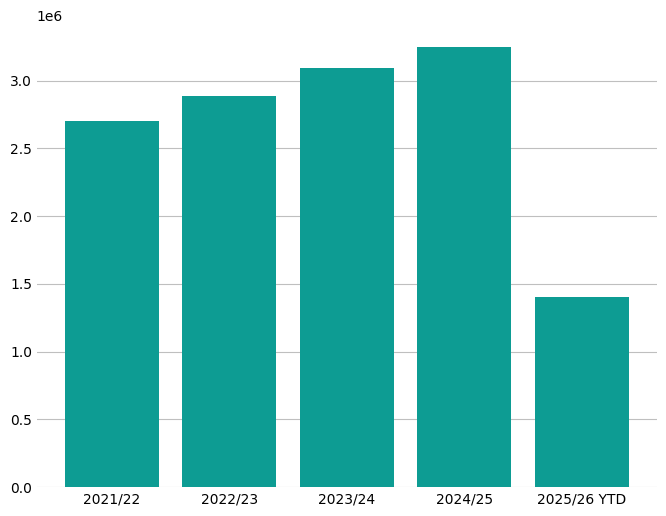

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(df_from_data_file['Year'], df_from_data_file['Total'])